# Failed attempts to use numpy and csv

In [1]:
import numpy as np
import csv

In [10]:
#np.genfromtxt('./consumption.csv',delimiter=',')
counter=0;
time_row=[];
first_row=[];
second_row=[];
with open('consumption.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        print(counter)
        #print(row)
        l_row=list(row)
        
        if counter==0:
            time_arr=np.array(l_row)
        elif counter==1:
            first_arr=np.array(l_row)
        elif counter==2:
            second_arr=np.array(l_row)
        if counter>10:
            break
        counter+=1;
            

0
1
2
3
4
5
6
7
8
9
10
11


In [15]:
print(first_arr.shape)
print(second_arr.shape)
print(first_arr[17520])
print(second_arr[17520])
#print(first_arr.ndim)

(17521,)
(17521,)
2017-12-31 23:30:00
2017-12-31 23:30:00


# Panda

Panda is a library meant for loading data sets 
it requires far less ram to load the entire data said aswell as being easier to implement

In [2]:
import pandas as pd
df = pd.read_csv('consumption.csv')

In [20]:
print(df)

                                        meter_id  2017-01-01 00:00:00  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                          ...                  ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
3246  0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

      2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
0                     NaN                  NaN      

iloc allow us to select an entire row of the data, which corresponds to one meter <br>
This row is converted to a numpy array which might be easier to input in a ML algorithme 

In [13]:
row3=df.iloc[3]
n_row3=row3.to_numpy()

In [14]:
print(n_row3)

['0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407' nan nan ... 0.038 0.04
 0.013999999999999999]


Calculating the mean at each time step and plotting it

In [8]:
mdf=df.mean()

In [3]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Mean half hourly energy usage in kWh'>

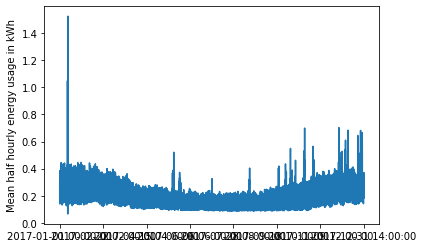

In [11]:
plt.close('all')
fig, ax = plt.subplots()
ax.set_ylabel('Mean half hourly energy usage in kWh')
mdf.plot()


In [4]:
all_but_dec=df.loc[:,"2017-01-01 00:00:00":"2017-11-30 23:30:00"]
dec=df.loc[:,"2017-12-01 00:00:00":"2017-12-31 23:30:00"]

In [5]:
mean_all_but_dec=all_but_dec.mean();
mean_dec=dec.mean();

In [6]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=0
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end


In [95]:
begin,end = get_monthi(7)
print(begin)
print(end)
begin,end = get_monthi(11)
print(begin)
print(end)
mean_all_but_dec[begin:end]

8689
10176
14593
16032


2017-11-01 00:30:00    0.181391
2017-11-01 01:00:00    0.163065
2017-11-01 01:30:00    0.160891
2017-11-01 02:00:00    0.155957
2017-11-01 02:30:00    0.142326
                         ...   
2017-11-30 21:30:00    0.269901
2017-11-30 22:00:00    0.251477
2017-11-30 22:30:00    0.225684
2017-11-30 23:00:00    0.189652
2017-11-30 23:30:00    0.160507
Length: 1439, dtype: float64

In [22]:
mean_jan=mean_all_but_dec[0:48*31]
print(mean_jan)
print(mean_jan.sum())
mean_jan.shape

2017-01-01 00:00:00    0.166211
2017-01-01 00:30:00    0.305056
2017-01-01 01:00:00    0.238358
2017-01-01 01:30:00    0.226979
2017-01-01 02:00:00    0.223267
                         ...   
2017-01-31 21:30:00    0.252355
2017-01-31 22:00:00    0.263113
2017-01-31 22:30:00    0.206942
2017-01-31 23:00:00    0.175673
2017-01-31 23:30:00    0.166900
Length: 1488, dtype: float64
393.30207189973595


(1488,)

In [7]:
means=[]
for i in range(11):
    begin,end=get_monthi(i+1)
    mean_month=mean_all_but_dec[begin:end]
    means.append(mean_month.mean())

In [8]:
mean_dec=mean_dec.mean()
means.append(mean_dec)

In [96]:
print(mean_month)

2017-11-01 00:30:00    0.181391
2017-11-01 01:00:00    0.163065
2017-11-01 01:30:00    0.160891
2017-11-01 02:00:00    0.155957
2017-11-01 02:30:00    0.142326
                         ...   
2017-11-29 22:00:00    0.249476
2017-11-29 22:30:00    0.219122
2017-11-29 23:00:00    0.185112
2017-11-29 23:30:00    0.159337
2017-11-30 00:00:00    0.142152
Length: 1392, dtype: float64


In [11]:
months=np.linspace(1,12,12)
print(months)
average_guess=np.mean(means[0:8])
avg_arr=average_guess*np.ones(4)
print(average_guess)
naive_guess=means[8]
naive_arr=naive_guess*np.ones(4)
end_months=np.arange(9,13,1)
print(end_months)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
0.1933189073955825
[ 9 10 11 12]


In [15]:
#drift method
ydrift=average_guess+3*(naive_guess-means[0])/(9-1)
print(ydrift)
drift_arr=np.array([naive_guess,ydrift])
drift_months=np.array([9,12])

0.15925488720234565


In [14]:
#naive drift method
nydrift=naive_guess+((means[8]-means[7])/(9-8))*(12-9);
print(nydrift)
ndrift_arr=np.array([naive_guess,nydrift])

0.22728243444769936


12
0.2862184665099131


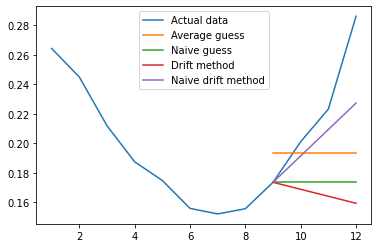

In [16]:
print(len(means))
print(mean_dec)
plt.plot(months,means,label='Actual data')
plt.plot(end_months,avg_arr,label='Average guess')
plt.plot(end_months,naive_arr,label='Naive guess')
plt.plot(drift_months,drift_arr,label='Drift method')
plt.plot(drift_months,ndrift_arr,label='Naive drift method')
plt.legend()
plt.show()

mean_jan=all_but_dec.mean(0:48*30-1)

## Amount of each month in the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [6]:
#setup
df = pd.read_csv("consumption.csv")
weather_avg = pd.read_csv('weather-avg.csv')
weather_min = pd.read_csv('weather-min.csv')
weather_max = pd.read_csv('weather-max.csv')
info = pd.read_csv('addinfo.csv')
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])
brinfo=info_sorted['num_bedrooms']
values = {'num_bedrooms' : brinfo.mean()}
info_filled_br = info_sorted.fillna(value = values)
brinfo_filled = info_filled_br['num_bedrooms']

In [10]:
#functions
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end

def get_mean_temp(row,month):
    """
    row: is the row (meter_id) we would like to get the average temperature for.
    month: which month (columns) we would get the average temperature for.
    returns: the average temperature for a specific meter_id for a specific month.
    """
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")

values = {'num_bedrooms' : -1}
info_filled_br_dummy = info_sorted.fillna(value = values)
brinfo_filled_dummy = info_filled_br_dummy['num_bedrooms']
brinfo_filled_dummy

meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    2.0
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   -1.0
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   -1.0
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407   -1.0
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f   -1.0
                                             ... 
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065   -1.0
0xfdaf9f857621ec06f2cf801f42a020a322835090   -1.0
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18   -1.0
0x47218b46abb2fcaade487a211911406dc6e13730   -1.0
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd   -1.0
Name: num_bedrooms, Length: 3248, dtype: float64

In [2]:
#function from Kfold encoding and past data notebook
def sort_data(nim):
    NaN_t=1200
    En_con=[]
    #number of input months (if nim=1 we should get the same as before)
    #this is the amount of months we want in our input space to predict the next monthly consumption     
    prev_con=[] #previous consumtion
    #extra info
    temps=[]
    temps_min=[]
    temps_max=[]
    month_arr=[]
    br_arr=[]
    br_arr_dummy=[]
    dwelling_type_bungalow=[]
    dwelling_type_detached_house=[]
    dwelling_type_flat=[]
    dwelling_type_semi_detached_house=[]
    dwelling_type_terraced_house=[]
    y = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
    
    
    for i in range(df.shape[0]): # loop over all users
        meter=df.iloc[i] # = row number i  
    
        #loop over all month from januari until month 12-nim
        #if the month is higher then this we don't have enough data for the nim input variables and the 1 output variable
        for m in range (1,13-nim): 
            #load current month
            bi, ei =get_monthi(m)               #bi (begin index) ei(end index)
            month=meter[bi:ei]  #data for the month m for the row user (row) i
            #load bedroom info
            row = brinfo_filled[i:i+1]
            row_dummy = brinfo_filled_dummy[i:i+1]
            #Load dwelling type
            dew_type_row = y[i:i+1]
            
            # Count the amount of NaN's in current      
            n_NaN=month.isnull().sum() 

            # Check if months have numeric values otherwise discard the month for this user. 
            if n_NaN<NaN_t:
                for j in range(m,13-nim):
                    #save input for month j,j+1,..,j+nim-1
                    input_months=np.zeros(nim)
                    for k in range(nim):
                        #load month for input j+k
                        bik,eik=get_monthi(j+k)
                        input_months[k]=meter[bik:eik].mean()
                    #debug if statement checks for NaN in input month
                    if np.isnan(np.sum(input_months)):
                        print("months=%i index=%i" %(j,i))
                        print(input_months)
                    prev_con.append(input_months)
                    #save output for month j+nim
                    bio,eio=get_monthi(j+nim)
                    En_con.append(meter[bio:eio].mean())
                    #save extra information 
                    temps.append(get_mean_temp(weather_avg_sorted.iloc[i:i+1],j+nim))
                    temps_min.append(get_mean_temp(weather_min_sorted.iloc[i:i+1],j+nim))
                    temps_max.append(get_mean_temp(weather_max_sorted.iloc[i:i+1],j+nim))
                    month_arr.append(j+nim)
                    br_arr.append(row[0])
                    br_arr_dummy.append(row_dummy[0])
                    dwelling_type_bungalow.append(dew_type_row.iloc[0, 0])
                    dwelling_type_detached_house.append(dew_type_row.iloc[0, 1])
                    dwelling_type_flat.append(dew_type_row.iloc[0, 2])
                    dwelling_type_semi_detached_house.append(dew_type_row.iloc[0, 3])
                    dwelling_type_terraced_house.append(dew_type_row.iloc[0, 4])

                    
                
                
                #break out of outer month loops since the inner month loop takes care of all months
                break
    # converting list to numpy arrays: 
    nptemps = np.zeros(len(temps))
    nptemps_min = np.zeros(len(temps_min))
    nptemps_max = np.zeros(len(temps_max))
    npEn_con = np.zeros(len(En_con))
    npmonth_arr = np.zeros(len(month_arr))
    npbr_arr = np.zeros(len(br_arr)) #converting it into numpy array.
    npbr_arr_dummy = np.zeros(len(br_arr_dummy)) #converting it into numpy array.

    for i in range(len(temps)):
         nptemps[i] = temps[i]

    for i in range(len(temps_min)):
         nptemps_min[i] = temps_min[i]

    for i in range(len(temps_max)):
         nptemps_max[i] = temps_max[i]

    for i in range(len(En_con)):
         npEn_con[i] = En_con[i]

    for i in range(len(month_arr)):
         npmonth_arr[i] = month_arr[i]

    for i in range(len(br_arr)):
        npbr_arr[i] = br_arr[i]        
    
    for i in range(len(br_arr_dummy)):
        npbr_arr_dummy[i] = br_arr_dummy[i]
        
    npprev_con=np.array(prev_con)
    dw_t_b = np.array(dwelling_type_bungalow)
    dw_t_d = np.array(dwelling_type_detached_house)
    dw_t_f = np.array(dwelling_type_flat)
    dw_t_s = np.array(dwelling_type_semi_detached_house)
    dw_t_t = np.array(dwelling_type_terraced_house)
    
    #This should probably be done differently 
    return npEn_con,npprev_con,nptemps,nptemps_min,nptemps_max,npmonth_arr,npbr_arr,npbr_arr_dummy,dw_t_b,dw_t_d,dw_t_f,dw_t_s,dw_t_t
    

In [11]:
#nim=1
npEn_con1,npprev_con1,nptemps1,nptemps_min1,nptemps_max1,npmonth_arr1,npbr_arr1,npbr_arr_dummy1,dw_t_b1,dw_t_d1,dw_t_f1,dw_t_s1,dw_t_t1=sort_data(1)
#nim=2
npEn_con2,npprev_con2,nptemps2,nptemps_min2,nptemps_max2,npmonth_arr2,npbr_arr2,npbr_arr_dummy2,dw_t_b2,dw_t_d2,dw_t_f2,dw_t_s2,dw_t_t2=sort_data(2)
#nim=3
npEn_con3,npprev_con3,nptemps3,nptemps_min3,nptemps_max3,npmonth_arr3,npbr_arr3,npbr_arr_dummy3,dw_t_b3,dw_t_d3,dw_t_f3,dw_t_s3,dw_t_t3=sort_data(3)

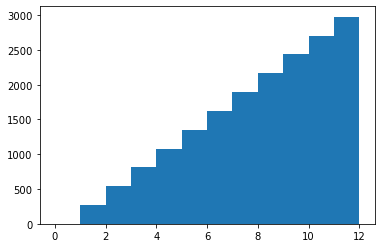

In [54]:
bins=np.arange(0,13)
mn,mbins,mpatches=plt.hist(npmonth_arr1-1, bins)
plt.show()

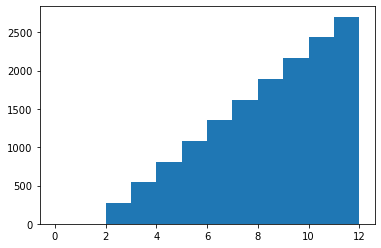

In [56]:
bins=np.arange(0,13)
mn2,mbins2,mpatches2=plt.hist(npmonth_arr2-1, bins)
plt.show()

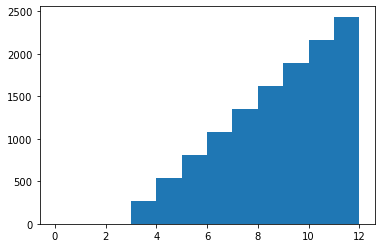

In [57]:
bins=np.arange(0,13)
mn3,mbins3,mpatches3=plt.hist(npmonth_arr3-1, bins)
plt.show()

In [58]:
print(np.count_nonzero(npmonth_arr1 == 1)) #there are no januari months in here which is strange
print(np.count_nonzero(npmonth_arr2 == 1)) #there are no januari months in here which is strange
print(np.count_nonzero(npmonth_arr3 == 1)) #there are no januari months in here which is strange

print(np.count_nonzero(npmonth_arr1 == 2)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr2 == 2)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr3 == 2)) #there are no febuari months in here which is strange

print(np.count_nonzero(npmonth_arr1 == 3)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr2 == 3)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr3 == 3)) #there are no febuari months in here which is strange

print(np.count_nonzero(npmonth_arr1 == 4)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr2 == 4)) #there are no febuari months in here which is strange
print(np.count_nonzero(npmonth_arr3 == 4)) #there are no febuari months in here which is strange

print(mn)
print(mn2)
print(mn3)
#in hindsight these result makes sense because in the case of 3 previous months we need the current month and the 2 previous
#months to predict the next month

0
0
0
269
0
0
540
269
0
810
540
269
[   0.  269.  540.  810. 1080. 1351. 1622. 1893. 2164. 2435. 2704. 2977.]
[   0.    0.  269.  540.  810. 1080. 1351. 1622. 1893. 2164. 2435. 2704.]
[   0.    0.    0.  269.  540.  810. 1080. 1351. 1622. 1893. 2164. 2435.]


In [59]:
#nim=0
npEn_con0,npprev_con0,nptemps1,nptemps_min1,nptemps_max1,npmonth_arr0,npbr_arr1,npbr_arr_dummy1,dw_t_b1,dw_t_d1,dw_t_f1,dw_t_s1,dw_t_t1=sort_data(0)

In [2]:
print(npmonth_arr0.shape)
bins=np.arange(0,13)
mn0,mbins0,mpatches0=plt.hist(npmonth_arr0-1, bins)
plt.show()

NameError: name 'npmonth_arr0' is not defined

In [1]:
print(mn0)

NameError: name 'mn0' is not defined